In [1]:
#Problem 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

In [2]:
df = load_breast_cancer()
df_data = df.data

df_input = pd.DataFrame(df_data)
df_labels = df.target 

labels = np.reshape(df_labels,(569,1)) 
final_df_data = np.concatenate([df_data,labels],axis=1) 
final_df_data.shape 

df_dataset = pd.DataFrame(final_df_data) 
features = df.feature_names 

features_labels = np.append(features,'label') 
df_dataset.columns = features_labels 
df = df_dataset
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
y = df.pop('label')
x = df.copy()

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

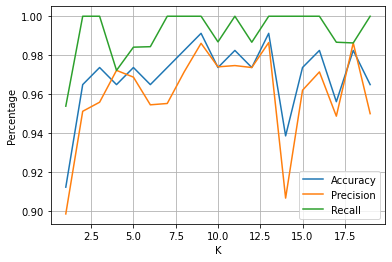

<Figure size 144x144 with 0 Axes>

Optimal K = 9
Accuracy = 0.9912280701754386 Precision = 0.9861111111111112 Recall = 1.0


In [4]:
#Part 1,2
K = range(1,20)
accuracy = []
recall = []
precision = []
K_current = []
for k in K:
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)

    x_train, x_test, y_train, y_test = train_test_split(principalDf,y, train_size = .8, test_size = .2)

    clf = SVC(kernel='linear',C=1).fit(x_train,y_train)

    predicted = clf.predict(x_test)
    expected = y_test

    K_current.append(k)
    accuracy.append(metrics.accuracy_score(expected, predicted))
    recall.append(metrics.recall_score(expected, predicted))
    precision.append(metrics.precision_score(expected, predicted))
    
plt.plot(K_current, accuracy, label="Accuracy")
plt.plot(K_current, precision, label="Precision")
plt.plot(K_current, recall, label="Recall")
plt.legend()
plt.grid()
plt.xlabel('K')
plt.ylabel('Percentage')
plt.figure(figsize=(2, 2))
plt.show()

max_K = accuracy.index(max(accuracy))
max_K
print('Optimal K =', max_K+1)
print('Accuracy =', accuracy[max_K],'Precision =', precision[max_K], 'Recall =', recall[max_K])

Accuracy = 0.9736842105263158 Precision = 0.9868421052631579 Recall = 0.974025974025974


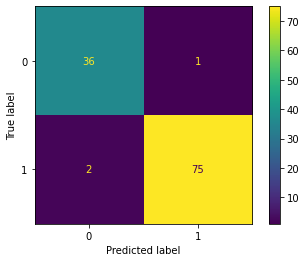

In [5]:
#Part 3 with K = max_K, kernel = rbf
accuracy = []
recall = []
precision = []

k = max_K
pca = PCA(n_components = k)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

x_train, x_test, y_train, y_test = train_test_split(principalDf,y, train_size = .8, test_size = .2)

clf = SVC(kernel='rbf',C=1).fit(x_train,y_train)

predicted = clf.predict(x_test)
expected = y_test
accuracy = metrics.accuracy_score(expected, predicted)
recall = metrics.recall_score(expected, predicted)
precision = metrics.precision_score(expected, predicted)

print('Accuracy =', accuracy,'Precision =', precision, 'Recall =', recall)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(expected, predicted))
confusion_matrix.plot()

Accuracy = 0.9122807017543859 Precision = 0.8780487804878049 Recall = 1.0


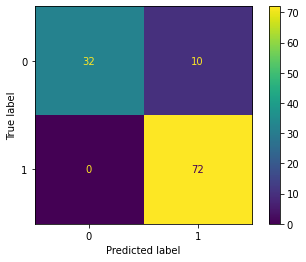

In [6]:
#Part 3 with K = max_K, kernel = poly
accuracy = []
recall = []
precision = []

k = max_K
pca = PCA(n_components = k)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

x_train, x_test, y_train, y_test = train_test_split(principalDf,y, train_size = .8, test_size = .2)

clf = SVC(kernel='poly',C=1).fit(x_train,y_train)

predicted = clf.predict(x_test)
expected = y_test
accuracy = metrics.accuracy_score(expected, predicted)
recall = metrics.recall_score(expected, predicted)
precision = metrics.precision_score(expected, predicted)

print('Accuracy =', accuracy,'Precision =', precision, 'Recall =', recall)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(expected, predicted))
confusion_matrix.plot()

Accuracy = 0.9385964912280702 Precision = 0.9428571428571428 Recall = 0.9565217391304348


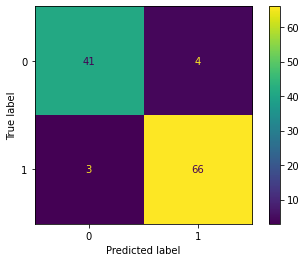

In [7]:
#Part 3 with K = max_K, kernel = sigmoid
accuracy = []
recall = []
precision = []

k = max_K
pca = PCA(n_components = k)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

x_train, x_test, y_train, y_test = train_test_split(principalDf,y, train_size = .8, test_size = .2)

clf = SVC(kernel='sigmoid',C=1).fit(x_train,y_train)

predicted = clf.predict(x_test)
expected = y_test
accuracy = metrics.accuracy_score(expected, predicted)
recall = metrics.recall_score(expected, predicted)
precision = metrics.precision_score(expected, predicted)

print('Accuracy =', accuracy,'Precision =', precision, 'Recall =', recall)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(expected, predicted))
confusion_matrix.plot()